In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_tmp=pd.read_csv("drive/MyDrive/Samsung_Prism/dataset_collection_necessary_Parameters.csv")

In [3]:
df_tmp

,src2dst_mean_piat_ms,dst2src_mean_piat_ms,src2dst_mean_ps,dst2src_mean_ps,src2dst_stddev_piat_ms,dst2src_stddev_piat_ms,src2dst_stddev_ps,dst2src_stddev_ps,src2dst_packets,dst2src_packets,src2dst_bytes,dst2src_bytes,src_port,dst_port,protocol,stream_type
0,17.694152,43.529070,1236.247808,113.869376,81.270950,122.136258,249.275658,125.135811,1711.0,689.0,2115220.0,78456.0,443.0,60018.0,17.0,0.0
1,23.354762,8.363327,107.386201,1261.272985,101.434072,60.643083,105.331664,186.876333,1261.0,3524.0,135414.0,4444726.0,59497.0,443.0,17.0,0.0
2,41.174815,5.004332,103.047337,1288.726945,510.831476,181.284757,85.271336,61.004737,676.0,5541.0,69660.0,7140836.0,50581.0,443.0,17.0,0.0
3,13.713143,125.428571,1281.583778,104.697917,380.109955,1101.581397,109.431671,157.745138,2626.0,288.0,3365439.0,30153.0,443.0,54321.0,17.0,1.0
4,164.671329,0.000000,79.854167,0.000000,684.114157,0.000000,1.462677,0.000000,144.0,0.0,11499.0,0.0,5353.0,5353.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1.835862,10.988563,1393.355599,105.538872,48.132333,116.143986,77.191234,81.928872,15689.0,2624.0,21860356.0,276934.0,443.0,63016.0,17.0,0.0
223,45.737319,8.863266,123.596745,1378.867210,372.704359,167.576549,170.615845,150.389874,553.0,2824.0,68349.0,3893921.0,64777.0,443.0,17.0,0.0
224,4.690591,3.849715,57.780303,1350.347323,91.431285,82.627148,45.535224,57.219178,4752.0,5790.0,274572.0,7818511.0,443.0,63367.0,6.0,0.0
225,10.161301,46.697161,1365.675796,131.710236,166.226818,356.302958,195.462744,185.990166,2921.0,635.0,3989139.0,83636.0,443.0,56809.0,17.0,0.0


In [4]:
X=df_tmp.loc[:,df_tmp.columns!="stream_type"]

In [5]:
y=df_tmp["stream_type"]

In [6]:
X

,src2dst_mean_piat_ms,dst2src_mean_piat_ms,src2dst_mean_ps,dst2src_mean_ps,src2dst_stddev_piat_ms,dst2src_stddev_piat_ms,src2dst_stddev_ps,dst2src_stddev_ps,src2dst_packets,dst2src_packets,src2dst_bytes,dst2src_bytes,src_port,dst_port,protocol
0,17.694152,43.529070,1236.247808,113.869376,81.270950,122.136258,249.275658,125.135811,1711.0,689.0,2115220.0,78456.0,443.0,60018.0,17.0
1,23.354762,8.363327,107.386201,1261.272985,101.434072,60.643083,105.331664,186.876333,1261.0,3524.0,135414.0,4444726.0,59497.0,443.0,17.0
2,41.174815,5.004332,103.047337,1288.726945,510.831476,181.284757,85.271336,61.004737,676.0,5541.0,69660.0,7140836.0,50581.0,443.0,17.0
3,13.713143,125.428571,1281.583778,104.697917,380.109955,1101.581397,109.431671,157.745138,2626.0,288.0,3365439.0,30153.0,443.0,54321.0,17.0
4,164.671329,0.000000,79.854167,0.000000,684.114157,0.000000,1.462677,0.000000,144.0,0.0,11499.0,0.0,5353.0,5353.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1.835862,10.988563,1393.355599,105.538872,48.132333,116.143986,77.191234,81.928872,15689.0,2624.0,21860356.0,276934.0,443.0,63016.0,17.0
223,45.737319,8.863266,123.596745,1378.867210,372.704359,167.576549,170.615845,150.389874,553.0,2824.0,68349.0,3893921.0,64777.0,443.0,17.0
224,4.690591,3.849715,57.780303,1350.347323,91.431285,82.627148,45.535224,57.219178,4752.0,5790.0,274572.0,7818511.0,443.0,63367.0,6.0
225,10.161301,46.697161,1365.675796,131.710236,166.226818,356.302958,195.462744,185.990166,2921.0,635.0,3989139.0,83636.0,443.0,56809.0,17.0


In [7]:
y

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
222    0.0
223    0.0
224    0.0
225    0.0
226    0.0
Name: stream_type, Length: 227, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
# sc = StandardScaler()
# X_train_standard = sc.fit_transform(X_train)
# X_test_standard = sc.transform(X_test)

In [10]:
X_train

,src2dst_mean_piat_ms,dst2src_mean_piat_ms,src2dst_mean_ps,dst2src_mean_ps,src2dst_stddev_piat_ms,dst2src_stddev_piat_ms,src2dst_stddev_ps,dst2src_stddev_ps,src2dst_packets,dst2src_packets,src2dst_bytes,dst2src_bytes,src_port,dst_port,protocol
28,58.760456,0.460570,110.200758,1285.994549,325.067344,4.954950,174.411301,82.491582,264.0,2385.0,29093.0,3067097.0,58233.0,443.0,17.0
16,26.397619,2.929525,102.738717,1286.324793,339.641523,117.291807,83.752232,80.920472,421.0,3747.0,43253.0,4819859.0,53279.0,443.0,17.0
171,23.388601,2.548487,105.984469,1286.113739,283.224447,95.881879,93.470792,81.568031,1159.0,10612.0,122836.0,13648239.0,64355.0,443.0,17.0
123,14.034256,93.446875,1211.340056,146.844237,86.519114,210.917633,293.714003,205.439105,2132.0,321.0,2582577.0,47137.0,443.0,52357.0,17.0
73,12.482090,4.884638,99.284862,1283.130687,374.485659,234.118949,48.670896,100.805003,1341.0,3451.0,133141.0,4428084.0,58843.0,443.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3.923873,3.177900,56.460834,1351.518793,29.183689,27.850491,37.413526,43.100107,6766.0,8354.0,382014.0,11290588.0,443.0,63367.0,6.0
137,35.994924,7.621440,86.940431,1223.513564,159.992066,75.150019,98.332985,256.663064,789.0,3723.0,68596.0,4555141.0,59308.0,443.0,17.0
72,8.409553,22.008101,1283.247884,101.538669,248.370887,393.789413,100.120051,67.619044,2953.0,1112.0,3789431.0,112911.0,443.0,58843.0,17.0
140,3.550720,0.701359,78.577211,1287.832158,18.948798,8.600063,34.911005,69.650768,8548.0,43267.0,671678.0,55720634.0,51223.0,443.0,17.0


In [11]:
y_test

39     0.0
168    1.0
93     1.0
62     1.0
197    0.0
189    0.0
38     0.0
122    0.0
105    0.0
89     1.0
4      1.0
162    1.0
193    0.0
95     1.0
99     1.0
107    0.0
31     1.0
106    0.0
67     1.0
127    0.0
166    1.0
34     0.0
164    1.0
170    1.0
44     0.0
152    1.0
190    0.0
220    0.0
18     1.0
163    1.0
148    1.0
132    0.0
108    0.0
19     1.0
84     1.0
91     1.0
33     0.0
51     0.0
35     0.0
11     1.0
29     1.0
0      0.0
216    0.0
207    0.0
208    0.0
85     1.0
Name: stream_type, dtype: float64

In [12]:
y_train

28     1.0
16     1.0
171    1.0
123    0.0
73     1.0
      ... 
203    0.0
137    0.0
72     1.0
140    0.0
37     0.0
Name: stream_type, Length: 181, dtype: float64

In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print(y_pred)

[0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]


In [16]:
model.score(X_test,y_test)

0.8913043478260869

In [17]:
model.score(X_train,y_train)

1.0

(15.5, -0.5)

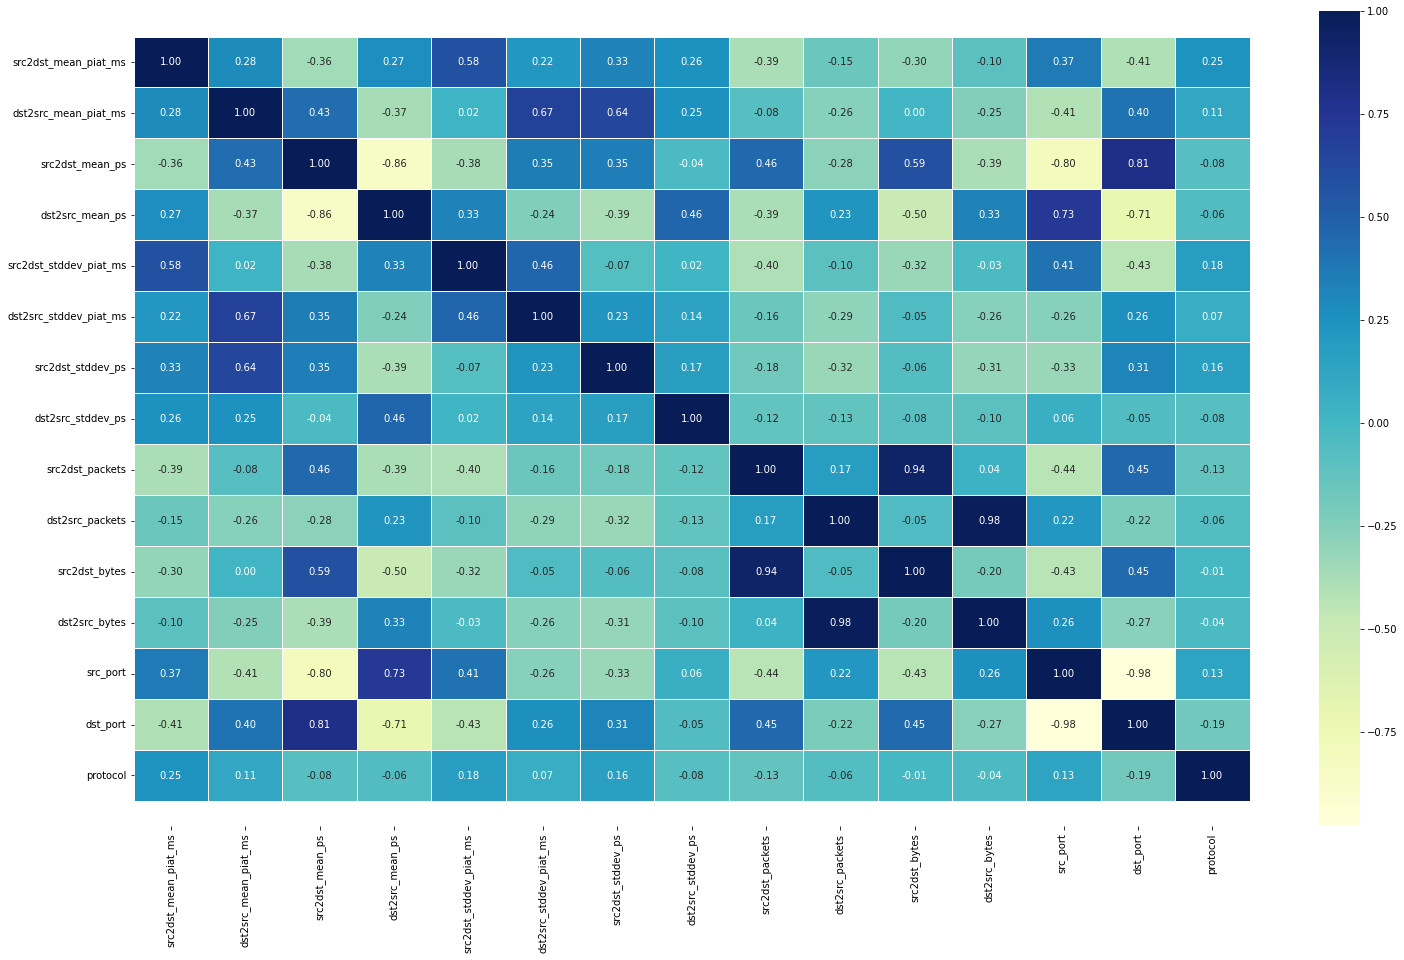

In [18]:
import seaborn as sns
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [19]:
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
        "Decision Tree":DecisionTreeClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    """
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [20]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test
                            )
model_scores

{'Logistic Regression': 0.717391304347826,
 'KNN': 0.6086956521739131,
 'Random Forest': 0.9347826086956522,
 'Decision Tree': 0.8478260869565217}

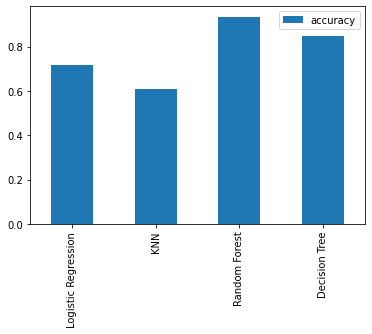

In [21]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();